In [1]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
news_df=pd.read_csv('train_news.csv')

In [3]:
news_df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [4]:
news_df.nunique()

Unnamed: 0    20800
id            20800
headline      19803
written_by     4201
news          20386
label             2
dtype: int64

In [5]:
news_df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [6]:
colunmsN=['Unnamed: 0','id','headline','written_by']
news_df.drop(columns=colunmsN,axis=1,inplace=True)

In [7]:
news_df.dropna(axis=0,inplace=True)

In [8]:
news_df.isnull().sum()

news     0
label    0
dtype: int64

In [9]:
print('Shape of Dataset ->',news_df.shape)

Shape of Dataset -> (20761, 2)


In [10]:
news_df.head(10)

,news,label
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,HOUSTON — Venezuela had a plan. It was a ta...,0
2,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,Finian Cunningham has written extensively on...,1
5,Taming the corporate media beast Whatever the ...,1
6,The State of New Jersey says you can’t eat the...,0
7,Advocates say prison officials at the Kilby Co...,1
8,People have made up their minds on president.\...,1
9,Leave a reply \nToni Emerson – When we fall in...,1


In [11]:
print('Label Count in Dataset :-\n',news_df.label.value_counts())

Label Count in Dataset :-
 0    10387
1    10374
Name: label, dtype: int64


In [12]:
#ratio
print('fake ratio =' ,round(len(news_df[news_df['label']==1])/len(news_df.label),2)*100,'%')
print('Notfake ratio =' ,round(len(news_df[news_df['label']==0])/len(news_df.label),2)*100,'%')

fake ratio = 50.0 %
Notfake ratio = 50.0 %


In [13]:
#New column for length of message
news_df['news_length']=news_df.news.str.len()
news_df.head()

,news,label,news_length
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936
1,HOUSTON — Venezuela had a plan. It was a ta...,0,6112
2,"Sunday on ABC’s “This Week,” while discussing ...",0,425
3,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516
4,Finian Cunningham has written extensively on...,1,9164


In [14]:
#converting all message to lower case
news_df['news']=news_df['news'].str.lower()

In [15]:
#Replace email address with 'email'
news_df['news']=news_df['news'].str.replace(r'^.+@[^\.].*\[a-z]{2,}$','emailaddress')
#Replace URLs with 'webaddress'
news_df['news']=news_df['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')
#Replace money symbol with 'moneysymb'(£ can type with ALT key+156)
news_df['news']=news_df['news'].str.replace(r'£|\$','dollers')
#Replace 10 digit phone number(format include paranthesis, space, no spaces,dashes) with 'phone number'
news_df['news']=news_df['news'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
#Replace number with 'numbr'
news_df['news']=news_df['news'].str.replace(r'^\d+(\.\d+)?','numbr')


In [16]:
#Remove punctuation
news_df['news']=news_df['news'].str.replace(r'[^\w\d\s]',' ')
#replace whitespace between terms with a single space
news_df['news']=news_df['news'].str.replace(r'\s+',' ')
#remove leading and trailing whitespace
news_df['news']=news_df['news'].str.replace(r'^\s+|\s+?$',' ')

In [17]:
#remove stopwords
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + ['u','ur','4','2','im','dont','doin','ure'])

news_df['news']=news_df['news'].apply(lambda x:' '.join(
    term for term in x.split() if term not in stop_words))

In [18]:
news_df['clean_length']=news_df.news.str.len()
news_df.head()

,news,label,news_length,clean_length
0,washington sonny perdue telling georgians grow...,0,7936,5485
1,houston venezuela plan tactical approach desig...,0,6112,4117
2,sunday abc week discussing republican plan rep...,0,425,269
3,augusta beleaguered republican governor maine ...,0,6516,4404
4,finian cunningham written extensively internat...,1,9164,6676


In [19]:
#Total length removal
print('Original Length',news_df.news_length.sum())
print('Clean Length',news_df.clean_length.sum())

Original Length 94518924
Clean Length 65084814


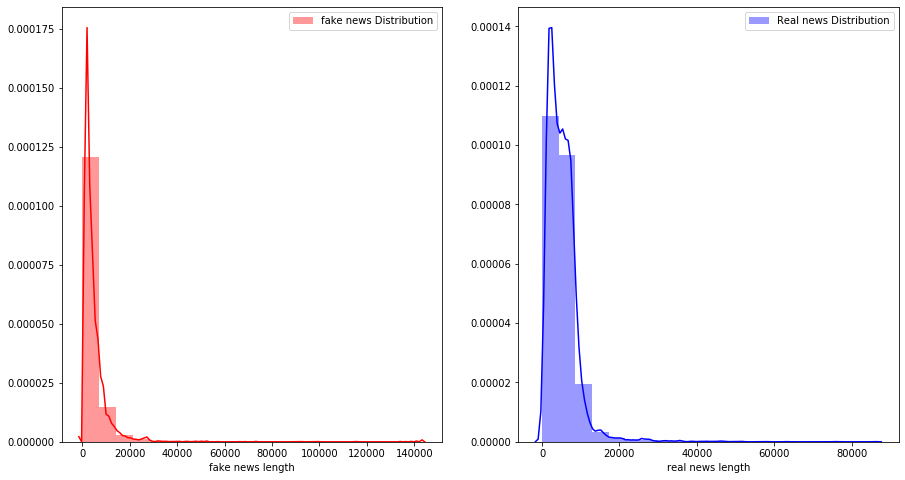

In [20]:
#Message distribution Before cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))
sns.distplot(news_df[news_df['label']==1]['news_length'],bins=20,ax=ax[0],label='fake news Distribution',color='r')
ax[0].set_xlabel('fake news length')
ax[0].legend()
sns.distplot(news_df[news_df['label']==0]['news_length'],bins=20,ax=ax[1],label='Real news Distribution',color='b')
ax[1].set_xlabel('real news length')
ax[1].legend()
plt.show()

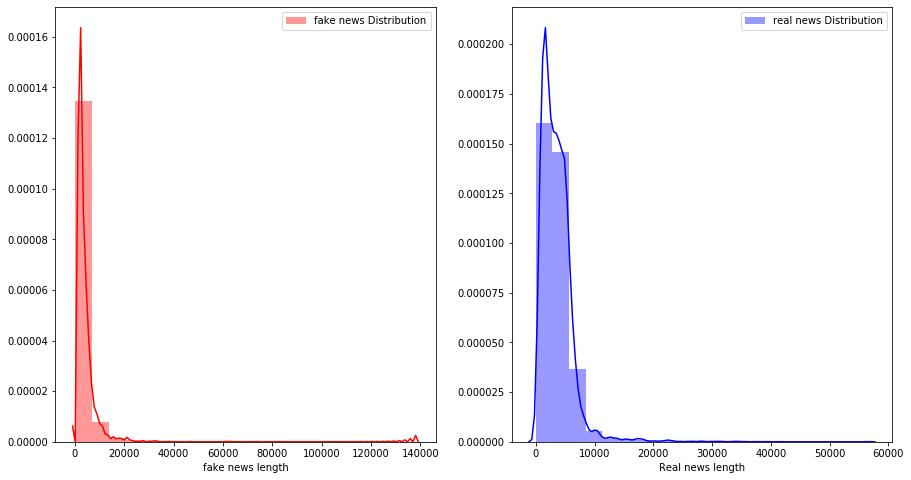

In [21]:
#Message distribution After cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))
sns.distplot(news_df[news_df['label']==1]['clean_length'],bins=20,ax=ax[0],label='fake news Distribution',color='r')
ax[0].set_xlabel('fake news length')
ax[0].legend()
sns.distplot(news_df[news_df['label']==0]['clean_length'],bins=20,ax=ax[1],label='real news Distribution',color='b')
ax[1].set_xlabel('Real news length')
ax[1].legend()
plt.show()

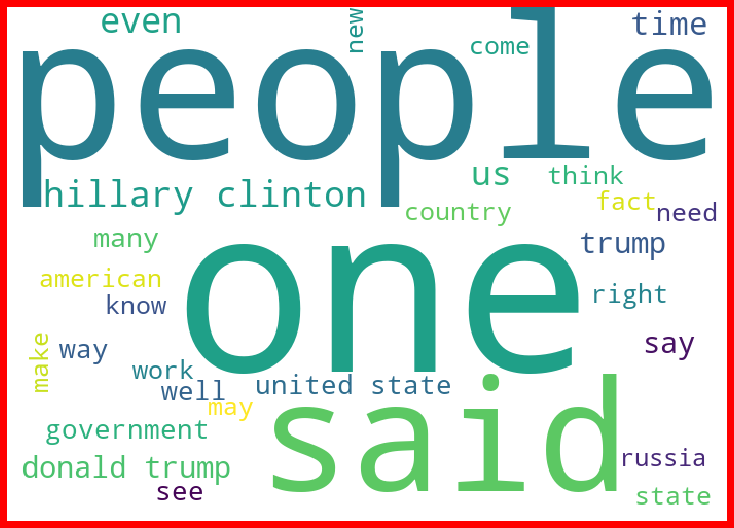

In [22]:
#getting sense of loud word in fake
from wordcloud import WordCloud

fakes=news_df['news'][news_df['label']==1]

fakes_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(fakes))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fakes_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

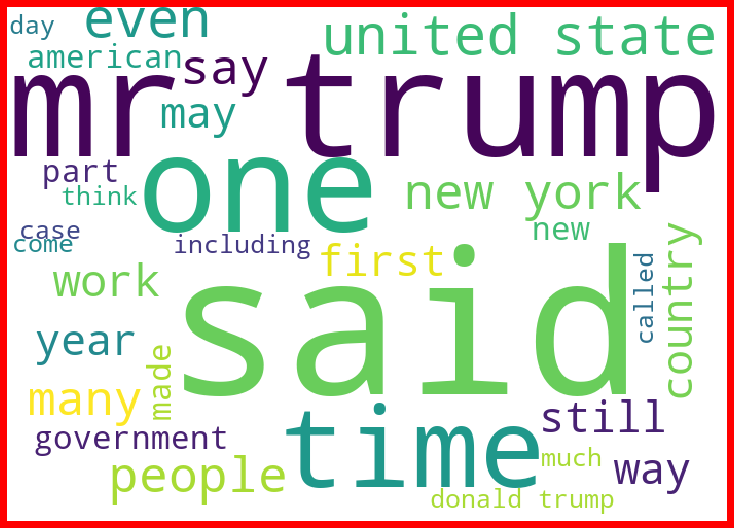

In [23]:
#getting sense of loud word in real
from wordcloud import WordCloud

real=news_df['news'][news_df['label']==0]

real_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(real))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(real_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
#Prediction - Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


tf_vec =TfidfVectorizer()
features = tf_vec.fit_transform(news_df['news'])

x=features
y=news_df['label']

In [25]:
#Split the data into train and test set for classifcation predictions

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
x_train.shape, y_train.shape, x_test.shape

((14532, 181071), (14532,), (6229, 181071))

In [26]:
Model=[]
score=[]
cvs=[]
rocscore=[]

KNeighborsClassifier(n_neighbors=6)
Accuracy_score=  0.5492053299084926
Cross_val_score= 0.551225812572753
roc_auc_score=  0.5494215631413588
classification_report
               precision    recall  f1-score   support

           0       0.98      0.10      0.18      3116
           1       0.53      1.00      0.69      3113

    accuracy                           0.55      6229
   macro avg       0.76      0.55      0.44      6229
weighted avg       0.76      0.55      0.44      6229
 

Confusion Matrix
 [[ 313 2803]
 [   5 3108]] 






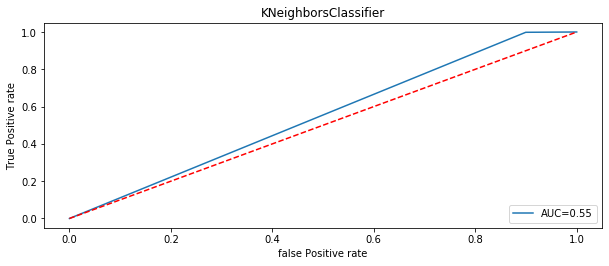

In [27]:
KNN=KNeighborsClassifier(n_neighbors=6)
Model.append('KNeighborsClassifier')
KNN.fit(x_train,y_train)
print(KNN)
pre=KNN.predict(x_test)
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(KNN,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc)
cvs.append(sc*100)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc)
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('KNeighborsClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

SVC()


Accuracy_score=  0.9616310804302456
Cross_val_score= 0.961803350828869 



roc_auc_score=  0.9616348601479487 

classification_report
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      3116
           1       0.95      0.97      0.96      3113

    accuracy                           0.96      6229
   macro avg       0.96      0.96      0.96      6229
weighted avg       0.96      0.96      0.96      6229
 

Confusion Matrix
 [[2972  144]
 [  95 3018]] 






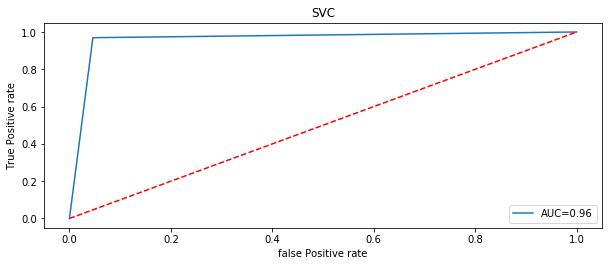

In [28]:
SV=SVC()
Model.append('SVC')
SV.fit(x_train,y_train)
print(SV)
pre=SV.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(SV,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('SVC')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

LogisticRegression()


Accuracy_score=  0.9515170974474233
Cross_val_score= 0.9521699498053036 

roc_auc_score=  0.9515215706876665 

classification_report
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      3116
           1       0.94      0.96      0.95      3113

    accuracy                           0.95      6229
   macro avg       0.95      0.95      0.95      6229
weighted avg       0.95      0.95      0.95      6229
 

Confusion Matrix
 [[2936  180]
 [ 122 2991]] 






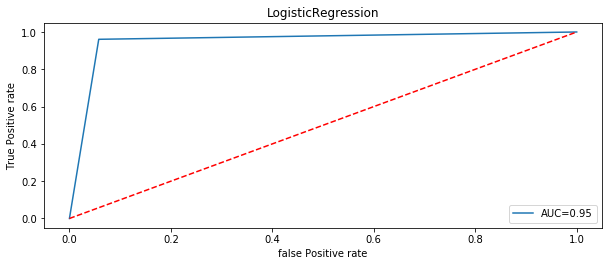

In [29]:
LR=LogisticRegression()
Model.append('LogisticRegression')
LR.fit(x_train,y_train)
print(LR)
pre=LR.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(LR,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
#print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('LogisticRegression')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

DecisionTreeClassifier(random_state=6)


Accuracy_score=  0.8893883448386579
Cross_val_score= 0.8886372620113047 



roc_auc_score=  0.8893902521497699 

classification_report
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      3116
           1       0.89      0.89      0.89      3113

    accuracy                           0.89      6229
   macro avg       0.89      0.89      0.89      6229
weighted avg       0.89      0.89      0.89      6229
 

Confusion Matrix
 [[2759  357]
 [ 332 2781]] 






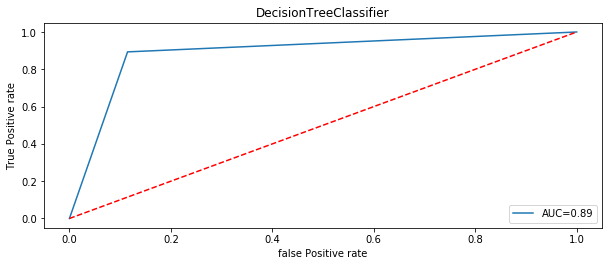

In [30]:
DT=DecisionTreeClassifier(random_state=6)
Model.append('DecisionTreeClassifier')
DT.fit(x_train,y_train)
print(DT)
pre=DT.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(DT,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('DecisionTreeClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

MultinomialNB()


Accuracy_score=  0.85455129234227
Cross_val_score= 0.8626752743217405 



roc_auc_score=  0.8544852284118899 

classification_report
               precision    recall  f1-score   support

           0       0.78      0.99      0.87      3116
           1       0.99      0.72      0.83      3113

    accuracy                           0.85      6229
   macro avg       0.88      0.85      0.85      6229
weighted avg       0.88      0.85      0.85      6229
 

Confusion Matrix
 [[3090   26]
 [ 880 2233]] 






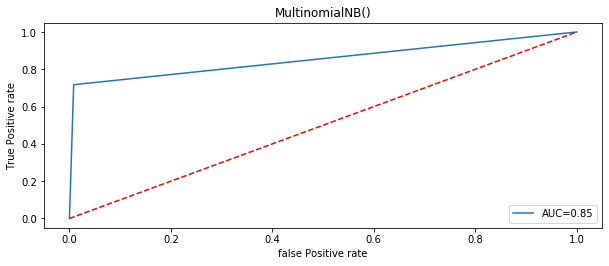

In [33]:
#GNB=GaussianNB()
native =MultinomialNB()
Model.append('MultinomialNB')
native.fit(x_train,y_train)
print(native)
pre=native.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(native,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(native)
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')


RandomForestClassifier(n_estimators=1000, random_state=0)


Accuracy_score=  0.9341788409054422
Cross_val_score= 0.9350225850616611 



roc_auc_score=  0.9341680010160711 

classification_report
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3116
           1       0.95      0.91      0.93      3113

    accuracy                           0.93      6229
   macro avg       0.94      0.93      0.93      6229
weighted avg       0.94      0.93      0.93      6229
 

Confusion Matrix
 [[2981  135]
 [ 275 2838]] 






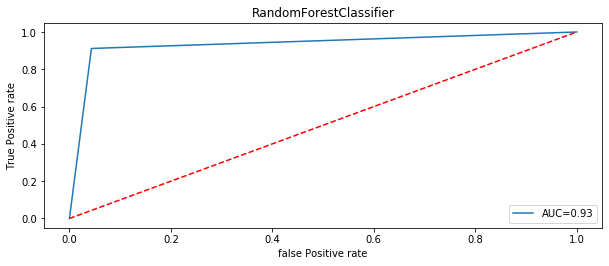

In [34]:
RFC=RandomForestClassifier(n_estimators=1000,random_state=0)
Model.append('RandomForestClassifier')
RFC.fit(x_train,y_train)
print(RFC)
pre=RFC.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(RFC,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('RandomForestClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

In [54]:
a={'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore}
result=pd.DataFrame.from_dict(a, orient='index')
result=result.T

In [67]:
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,54.9205,55.1226,54.9422
1,SVC,96.1631,96.1803,96.1635
2,LogisticRegression,95.1517,95.217,95.1522
3,DecisionTreeClassifier,88.9388,88.8637,88.939
4,GaussianNB,85.4551,86.2675,85.4485
5,MultinomialNB,85.4551,86.2675,85.4485
6,RandomForestClassifier,93.4179,93.5023,93.4168


In [68]:
#from sklearn.externals 
import joblib
joblib.dump(SV,'Fake_News_Detection_Project_Model.pkl')

['Fake_News_Detection_Project_Model.pkl']

In [69]:
model=joblib.load('Fake_News_Detection_Project_Model.pkl')

In [70]:
result1=pd.DataFrame(model.predict(x_test))

In [71]:
result1.to_csv('Fake_News_Detection_Project_Model_prdictresults.csv')